## Task 2. Eigenfaces

***

__(1) Use numpy to find the mean of each row of Xsub and reshape as a 4096 × 1 vector (call this xbar). Adapt the Python code below to visualise this “mean face” and compare it to the image stored in the column of Xall corresponding to the last two digits of your Student ID.__

Ans: The following code snippet displays the calculation of finding the mean of each row of Xsub and then reshaping it as a 4096 x 1 vector.

In [1]:
''' Find the mean of each row of Xsub and reshape as a 4096 × 1 vector '''
import numpy as np
import sklearn.datasets

faces = sklearn.datasets.fetch_olivetti_faces()
Xall = faces.data.T
print(Xall.shape)
print(Xall.min(), Xall.max())
Xsub = Xall[:,100:]

# Calculating the mean of each row of Xsub
mean_xsub = np.mean(Xsub, axis=1)
print('The mean of each row is: ',mean_xsub)

# Reshaping mean_xsub as a 4096 × 1 vector
xbar = mean_xsub.reshape(4096, 1)
print('The reshaped 4096 x 1 vector is: ',xbar)

(4096, 400)
0.0 1.0
The mean of each row is:  [0.3905096  0.42533058 0.46792012 ... 0.32552347 0.31852624 0.31603312]
The reshaped 4096 x 1 vector is:  [[0.3905096 ]
 [0.42533058]
 [0.46792012]
 ...
 [0.32552347]
 [0.31852624]
 [0.31603312]]


Now, we need to visualize the mean face and then compare it with the image that is stored in the column of Xall corresponding to the last two digits of my Student ID. Since my student ID is 13350923, so I will be picking column 23.

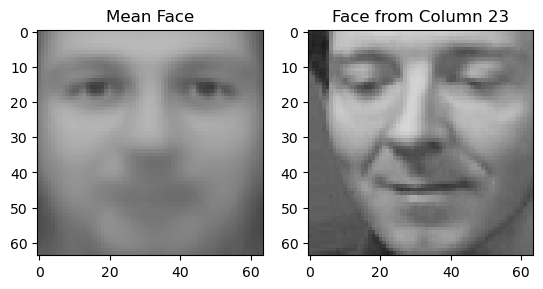

In [2]:
''' Visualizing the “mean face” and comparing it to the image stored in the column of Xall'''

import matplotlib.pyplot as plt

# Plotting the mean face
plt.subplot(1,2,1)
plt.imshow(xbar.reshape(64,64), cmap=plt.cm.gray, vmin=0, vmax=1)
plt.title('Mean Face')

# Plotting the image corresponding to column 23 of Xall
plt.subplot(1,2,2)
plt.imshow(Xall[:, 23].reshape(64, 64), cmap=plt.cm.gray, vmin=0, vmax=1)
plt.title('Face from Column 23')

plt.show()

When I compare the mean face with the face in column 23, the clear observation that I get is that the mean face is blurred out and the new face is clearer. Also, there are some features in the new image that could be considered as "somewhat" similar to the mean image such as nose and eyebrows. Overall, the face we get is unique with some similarities.

***
***

__(2) Use numpy.cov() to calculate the covariance matrix of Xsub, giving a 4096 × 4096 matrix (call this matrix 𝐶). Then use numpy.linalg.eigh() to find the eigenvalues (𝑉) and ... matrix and that 𝐶 = 𝑃𝐷𝑃^T__

Ans: To calculate the covariance matrix, find the eigenvalues (𝑉) and eigenvectors (columns of P), confirm that P is an orthogonal matrix and that C = PDP^T, we need to follow the below code:

In [3]:
''' Calculate the covariance matrix, find the eigenvalues (𝑉) and eigenvectors, confirm that P is an orthogonal matrix
and that C = PDP^T '''
import numpy as np
import sklearn.datasets

faces = sklearn.datasets.fetch_olivetti_faces()
Xall = faces.data.T
Xsub = Xall[:,100:]

# Calculating the  4096 × 4096 covariance matrix of Xsub
cov_Xsub = np.cov(Xsub)
C = cov_Xsub.reshape(4096, 4096)
print('Covariance matrix of Xsub: ',C)

# Finding the eigenvalues (V) and eigenvectors (P) of C
V, P = np.linalg.eigh(C)
print('Eigenvalues(V) and Eigenvectors(P): ',V,P)

# Reversing the entries in V and the columns of P
V = V[::-1]
P = P[:, ::-1]

# Creating diagonal matrix D from V
D = np.diag(V)

# Confirming that P is an orthogonal matrix
print('P is an Orthogonal Matrix ?: ', np.allclose(np.dot(P.T, P), np.eye(P.shape[0])))

# Confirming that C = PDP^T
print('C = PDP^T ?: ',np.allclose(C, np.dot(np.dot(P, D), P.T)))

Covariance matrix of Xsub:  [[ 0.03084074  0.03100131  0.02729914 ... -0.00671148 -0.0060668
  -0.0046745 ]
 [ 0.03100131  0.03565887  0.03420961 ... -0.00963687 -0.00904954
  -0.00710847]
 [ 0.02729914  0.03420961  0.0390621  ... -0.01333122 -0.01256156
  -0.01047438]
 ...
 [-0.00671148 -0.00963687 -0.01333122 ...  0.03512791  0.03117954
   0.02740946]
 [-0.0060668  -0.00904954 -0.01256156 ...  0.03117954  0.03426654
   0.03167892]
 [-0.0046745  -0.00710847 -0.01047438 ...  0.02740946  0.03167892
   0.03343482]]
Eigenvalues(V) and Eigenvectors(P):  [-5.72288494e-15 -4.59487947e-15 -4.01435631e-15 ...  6.84074595e+00
  1.01118057e+01  1.80279783e+01] [[ 0.          0.          0.         ...  0.00147455 -0.02729248
  -0.01005122]
 [-0.35898579  0.21645527 -0.08992395 ... -0.00148275 -0.03261569
  -0.01406507]
 [ 0.00312889 -0.2329734   0.18851403 ... -0.00097586 -0.0387594
  -0.01734151]
 ...
 [-0.01292781  0.0033576   0.01606663 ... -0.0191065   0.02771786
   0.00833262]
 [ 0.00245271

Here, we get all the asked outputs:
1.	Covariance matrix of Xsub
2.	Eigenvalues and Eigenvectors
3.	Check P is an Orthogonal matrix or not
4.	Check the condition C=PDP^T is true or not

***
***

__(3) (a) The eigenvectors of 𝐶 (i.e. the columns of 𝑃) are called “eigenfaces” (Turk and Pentland, 1991). Visualise the eigenfaces corresponding to the largest 10 eigenvalues. Comment on what you discover.__

Ans. Now that we have figured out the eigenvectors of C, we have "eigenfaces". To visualize the eigenfaces corresponding to the largest 10 eigenvalues, we have to use the following code:

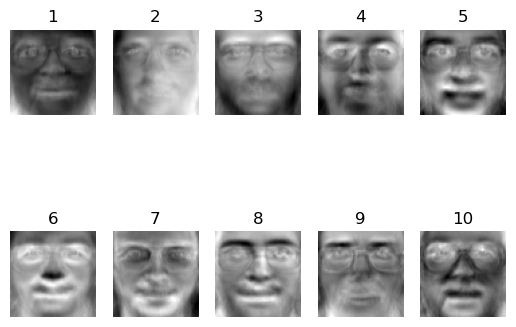

In [4]:
# Plotting the eigenfaces corresponding to the largest 10 eigenvalues
plt.figure()
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(P[:, i].reshape(64, 64), cmap=plt.cm.gray)
    plt.title(f"{i+1}")
    plt.axis('off')
plt.show()

While plotting the eigenfaces corresponding to the largest 10 eigenvalues, here is what my observations are:
* We get set of faces from the dataset which have different facial expressions and lighting conditions
* Nome of them is a clear image since it is developed from eigenvalues and could be is used as a reference point for comparing other faces
* These faces can be combined to reconstruct any face in the dataset, with varying levels of perfection

***

__(3)(b) Show (by example) that if y is any one column of Ysub then P@y+xbar perfectly recreates the corresponding column of Xsub. This shows that each “face” in Xsub is a “linear combination” of eigenfaces plus the “mean face”.__

Ans. If y is any one column of Ysub, here in this question, we need to show that the face generated from the equation P@y+xbar prefectly recreates the corresponding column of Xsub we have calculated above.
Note: The value y is not specified in the question so I am using np.random.randint() function to randomly select any column since I do not want the code to be restricted to only one column choice.

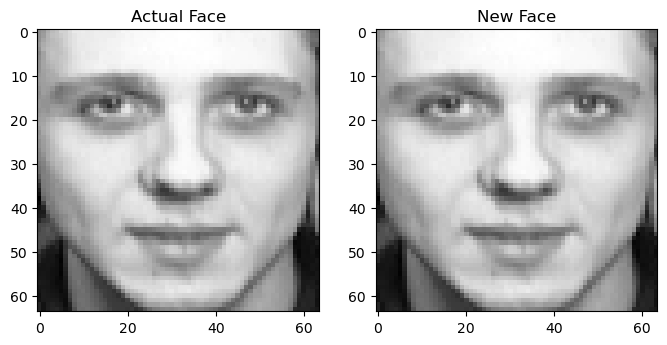

Do the faces perfectly recreate the corresponding column of Xsub?
True


In [5]:
# Calculating Ysub as per the instruction given in the task
Ysub = np.dot(P.T, Xsub-xbar)

# Testing code by selecting column 3 of Ysub
# y = Ysub[:,3].reshape((4096,1))

# Generating random index within the range of the number of columns
columns = Ysub.shape[1]
random_index = np.random.randint(columns)

# Selecting the column corresponding to the random index
y = Ysub[:, random_index].reshape((4096, 1))

# Recreating corresponding column of Xsub
x_new = P @ y + xbar

# Plotting faces
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
plt.imshow(Xsub[:,random_index].reshape((64,64)), cmap=plt.cm.gray)
plt.title('Actual Face')
plt.subplot(1, 2, 2)
plt.imshow(x_new.reshape((64,64)), cmap=plt.cm.gray)
plt.title('New Face')
plt.show()

# Comparing and declaring the results
print('Do the faces perfectly recreate the corresponding column of Xsub?')
print(np.allclose(Xsub[:,random_index].reshape((4096,1)), x_new))

Therefore, we can say that the output shows that each “face” in Xsub is a “linear combination” of eigenfaces plus the “mean face”.

***

__(3)(c) Although 𝑃 is a 4096 × 4096 matrix, generally only those eigenfaces corresponding to the 
largest eigenvalues of 𝐶 are “useful”. ...  Build an appropriate line graph as part of your investigation.__

Ans. Since we need to find the "useful" eigenfaces in order to calculate the Xpartial, we have to first find the largest eigenvalues of C. For that, sorting the values is essential so that we can pick a value from that set of values.
Then, a random k is picked up (with k>=2) and with the given condition, we can generate Xpartial.

In [6]:
# Sorting eigenvalues in descending order
sort_eigen = np.argsort(V)[::-1]

# Selecting the random k (such that k>=2) from largest eigenvalues
k = np.random.randint(2, len(sort_eigen))

# Finding first k columns of P
sort_eigen = sort_eigen[:k]
col_P = P[:, sort_eigen]

# Finding first k rows of Ysub
row_Ysub = Ysub[:k, :]

# Caluclating Xpartial
Xpartial = col_P @ row_Ysub + xbar
print(Xpartial)

[[0.28925614 0.18595037 0.32644625 ... 0.49999996 0.21487598 0.51652886]
 [0.23966951 0.25619843 0.14462818 ... 0.53305795 0.21900834 0.46281   ]
 [0.22727272 0.68181817 0.26033057 ... 0.60743801 0.21900825 0.28099172]
 ...
 [0.09504142 0.16115713 0.14049597 ... 0.17768605 0.57438026 0.35950423]
 [0.10743803 0.26859506 0.3016529  ... 0.14876035 0.59090909 0.35537191]
 [0.11157028 0.21900831 0.15702484 ... 0.19008268 0.6033058  0.38429756]]


Now, we have Xpartial and we need to check how well these values approximates Xsub for different values of k. For this, we have to use np.linalg.norm() to Xpartial and subtract Xsub from it.

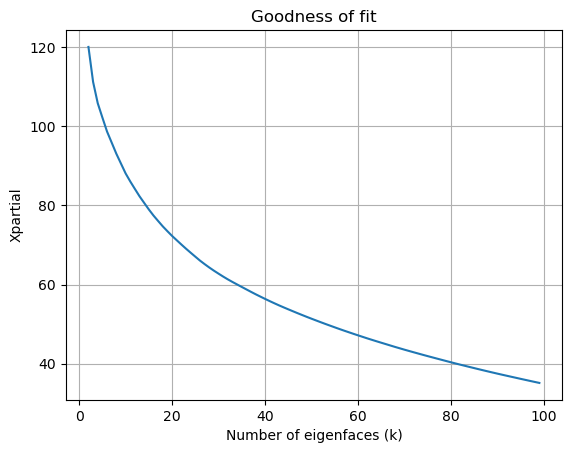

In [7]:
# Computing how well Xpartial approximates Xsub for different values of k
values_norm = []
values_k = range(2, 100)

for k in values_k:
    sort_eigen = np.argsort(V)[::-1][:k]
    col_P = P[:, sort_eigen]
    row_Ysub = Ysub[:k, :]
    Xpartial = col_P @ row_Ysub + xbar
    norm = np.linalg.norm(Xpartial - Xsub)
    values_norm.append(norm)

# Plotting values
plt.plot(values_k, values_norm)
plt.title('Goodness of fit')
plt.xlabel('Number of eigenfaces (k)')
plt.ylabel('Xpartial')
plt.grid()
plt.show()

In the above plot, we can observe that as the number of eigenfaces(k) increases, the Xpartial decreases. This shows that the recreated faces become closer to the original images. In other words, using more eigenfaces results in a more accurate approximation of the original images.
However, there comes a limit where adding more eigenfaces does not help the approximation. I tried this by changing the range of _values_k"_ to 500 instead of 100 and observed a parallel line to the x-axis, not making any difference.

Note: I had to study the linalg.norm() function since I was not familiar with it. I used the official documentation from Numpy.org at https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html for this purpose.

***
***